In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport Hunch_tSNEplot

reload set for module  Hunch_utils
reload set for module  Hunch_lsplot
reload set for module  models.AEFIT
reload set for module  models.AEFIT_v1
reload set for module  models.AEFIT0
reload set for module  models.AEFIT1
reload set for module  models.SPFIT
reload set for module  Dummy_g1data


In [2]:
qsh = Htls.QSH_Dataset()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_1.npy')    
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')

In [3]:
qsh.shuffle()
# qsh.filter_number_set(15)
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive()

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  61519


In [4]:
qsh.set_null(np.nan)
qsh.clip_values(0.1,0.6)
qsh.set_normal_positive()

## t-SNE Plot

In [ ]:
qsh.set_null(-1)
sne = Htls.tSNE()
# sne.perplexity = 50.
sne.random = 42

ds = qsh[range(0,4000)]
ds = np.concatenate([ds['prel'],ds['te']], axis=1)
# ds = np.array(list(zip(ds['prel'],ds['te'])))
sne(ds)

In [ ]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hsne.tSNE_PlotBokeh()
p.set_model(sne)
p.set_data(qsh, 1000)
p.plot(notebook_url='http://172.17.0.2:8888')

## VAE reconstruction - beta

In [5]:
import models.AEFIT2 as aefit
q_vae = aefit.AEFIT2(latent_dim=2, feature_dim=30, dprate=0.4, scale=4, beta=500.)
qsh.set_null(np.nan)

aefit 0 configured new


0-20 loss: 18.303215
0-40 loss: 18.410883
0-60 loss: 18.366589
0-80 loss: 18.332376
0-100 loss: 18.488052
0-120 loss: 18.313162
0-140 loss: 18.377790
0-160 loss: 18.344368
0-180 loss: 18.375645
0-200 loss: 18.471542
0-220 loss: 18.350897
0-240 loss: 18.355528
0-260 loss: 18.390450
0-280 loss: 18.240921
0-300 loss: 18.333714
1-320 loss: 18.361221
1-340 loss: 18.420660
1-360 loss: 18.395168
1-380 loss: 18.466278
1-400 loss: 18.246523
1-420 loss: 18.279608
1-440 loss: 18.302341
1-460 loss: 18.300695
1-480 loss: 18.277922
1-500 loss: 18.535772
1-520 loss: 18.368618
1-540 loss: 18.395744
1-560 loss: 18.313902
1-580 loss: 18.269215
1-600 loss: 18.299786
2-620 loss: 18.315489
2-640 loss: 18.402443
2-660 loss: 18.371405
2-680 loss: 18.416506
2-700 loss: 18.541859
2-720 loss: 18.340532
2-740 loss: 18.431038
2-760 loss: 18.360889
2-780 loss: 18.347141
2-800 loss: 18.486515
2-820 loss: 18.419353
2-840 loss: 18.298988
2-860 loss: 18.296837
2-880 loss: 18.310339
2-900 loss: 18.489319
2-920 loss: 18

InvalidArgumentError: slice index 119 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

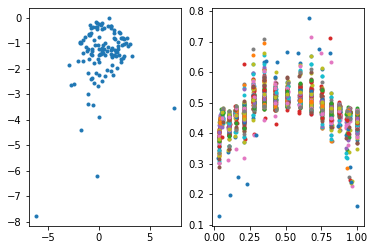

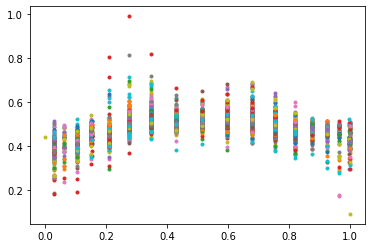

In [166]:
aefit.test_dummy(q_vae, qsh, batch=200, epoch=10, loss_factor=1e-3)

In [294]:
q_vae.save('step6_beta_r15_2')

In [295]:
q_vae.load('step6_beta_r15_2')

In [296]:
from bokeh.io import show, output_notebook
output_notebook()

p = Hplt.LSPlotBokeh()
p.set_model(q_vae)
p.set_data(qsh, counts=8000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [203]:
# extract few points curve
import copy

qsh2 = Htls.QSH_Dataset()
qsh2.load(ipysh.abs_builddir+'/te_db_r15.npy')
qsh2.dim = 15
qsh2.set_null(np.nan)
qsh2.set_normal_positive()
qsh2.unbias_mean(0.5, 'te')
qsh2.set_normal_positive()
qsh2.set_null(np.nan)
qsh2.clip_values(0.1,0.6)
qsh2.set_normal_positive()


qsh2.filter_number_set(10)
qsh2.dim = 15




tf.Tensor(
[0.06214391 0.10277789 0.15121816 0.20828514 0.27427357 0.3485927
 0.42948723 0.51404023        nan        nan 0.75380695        nan
        nan 0.96593666        nan 0.34677976 0.39613593 0.4620747
 0.4517362  0.52208304 0.53900796 0.53816104 0.5709612         nan
        nan 0.55388504        nan        nan 0.44481075        nan], shape=(30,), dtype=float32)
[-1.4239532 -1.7441256]


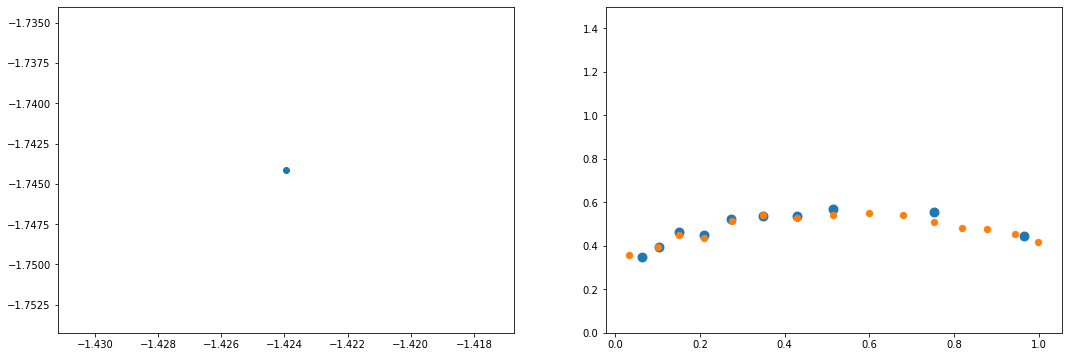

In [293]:

fig = plt.figure('gen_missing_curve',figsize=(18, 6))
plt.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
# ax1.set_xlim(-2.,2.)
ax2.set_ylim(0.,1.5)

qsh2.shuffle()
for xy in qsh2.ds_array.take(1):
    xy,_ = xy
    print(xy)
    x,y = tf.split(xy,2)
    ax2.scatter(x,y,s=80)
    m,v  = q_vae.encode([xy])    
    gpt = m[0].numpy()
    print(gpt)
    ax1.scatter(gpt[0],gpt[1])

    XY = q_vae.decode(m,apply_sigmoid=True)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())

    ax2.scatter(X,Y,s=40)

